# Movie Recommender


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv(r'C:\Users\Vishu\Documents\Python Workspace\DATASETS\Movie Recommender\movies.csv')
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
data = pd.read_csv(r'C:\Users\Vishu\Documents\Python Workspace\DATASETS\Movie Recommender\ratings.csv')
data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
main = pd.merge(data,df,on='movieId')
main.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [6]:
main.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [7]:
mean_rating = pd.DataFrame(main.groupby('title')['rating'].mean())
mean_rating['No of ratings'] = pd.DataFrame(main.groupby('title')['rating'].count())
mean_rating.head()

,rating,No of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


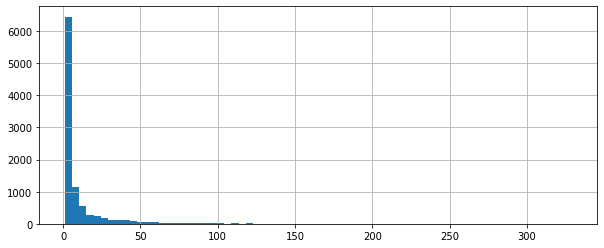

In [8]:
fig= plt.figure(figsize=(10,4))
mean_rating['No of ratings'].hist(bins=70)
plt.show()

In [9]:
movies = main.pivot_table(index='userId',columns='title',values='rating')
movies.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
mean_rating.sort_values('No of ratings',ascending=False).head(10)

,rating,No of ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [11]:
present_movie = movies['Forrest Gump (1994)']
next_movie = movies.corrwith(present_movie)

recommend = pd.DataFrame(next_movie,columns=['recommendation'])
recommend.dropna(inplace=True)
recommend.sort_values('recommendation',ascending=False).head(10)

C:\Users\Vishu\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Vishu\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,recommendation
title,
Lost & Found (1999),1.0
"Century of the Self, The (2002)",1.0
The 5th Wave (2016),1.0
Play Time (a.k.a. Playtime) (1967),1.0
Memories (Memorîzu) (1995),1.0
Playing God (1997),1.0
Killers (2010),1.0
"Girl Walks Home Alone at Night, A (2014)",1.0
Tampopo (1985),1.0


In [12]:
recommend = recommend.join(mean_rating)

In [13]:
recommend[recommend['No of ratings'] > 100].sort_values('recommendation',ascending=False).head(10)

,recommendation,rating,No of ratings
title,,,
Forrest Gump (1994),1.000000,4.164134,329
Good Will Hunting (1997),0.484042,4.078014,141
Aladdin (1992),0.464268,3.792350,183
American History X (1998),0.457287,4.217054,129
"Truman Show, The (1998)",0.432556,3.812000,125
Braveheart (1995),0.416976,4.031646,237
Ferris Bueller's Day Off (1986),0.405830,3.839450,109
Mrs. Doubtfire (1993),0.401408,3.388889,144
Full Metal Jacket (1987),0.397241,4.098039,102


In [16]:
present_movie = movies['Doctor Strange (2016)']
next_movie = movies.corrwith(present_movie)

recommend = pd.DataFrame(next_movie,columns=['recommendation'])
recommend.sort_values('recommendation',ascending=False).head()

recommend = recommend.join(mean_rating)
recommend[recommend['No of ratings'] > 100].sort_values('recommendation',ascending=False).head(10)

C:\Users\Vishu\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Vishu\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,recommendation,rating,No of ratings
title,,,
Aladdin (1992),0.914991,3.792350,183
Clueless (1995),0.912871,3.293269,104
Die Hard: With a Vengeance (1995),0.878310,3.555556,144
"Mask, The (1994)",0.842905,3.184713,157
Twelve Monkeys (a.k.a. 12 Monkeys) (1995),0.810101,3.983051,177
Ghost (1990),0.776062,3.434783,115
Ace Ventura: Pet Detective (1994),0.773924,3.040373,161
Interview with the Vampire: The Vampire Chronicles (1994),0.763763,3.458716,109
Seven (a.k.a. Se7en) (1995),0.754584,3.975369,203
